# LGBM

In [ ]:
import pandas as pd
import joblib
import lightgbm as lgb
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

c:\Users\Sebastijan\anaconda3\envs\diabetes-insight\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from utils import load_and_prepare_data, evaluate_metrics, plot_roc_curve, optimize_threshold

In [3]:
df = pd.read_parquet("../diabetes_dataset_prepared.parquet")
X_train, X_test, y_train, y_test = load_and_prepare_data(df)

Given that our untuned xgb model performed very well (f1 score of 0.92) with just a single feature, we will try a similar approach here as well. No need to search for optimal hyperparameters when all of our models cap around 0.929 f1 score.

In [4]:
lgbm_1 = LGBMClassifier(random_state=2025)
lgbm_1.fit(X_train, y_train)

y_train_pred = lgbm_1.predict(X_train)
y_test_pred = lgbm_1.predict(X_test)

[LightGBM] [Info] Number of positive: 48075, number of negative: 31925
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1307
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.600938 -> initscore=0.409373
[LightGBM] [Info] Start training from score 0.409373


c:\Users\Sebastijan\anaconda3\envs\diabetes-insight\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sebastijan\anaconda3\envs\diabetes-insight\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training Set Metrics:


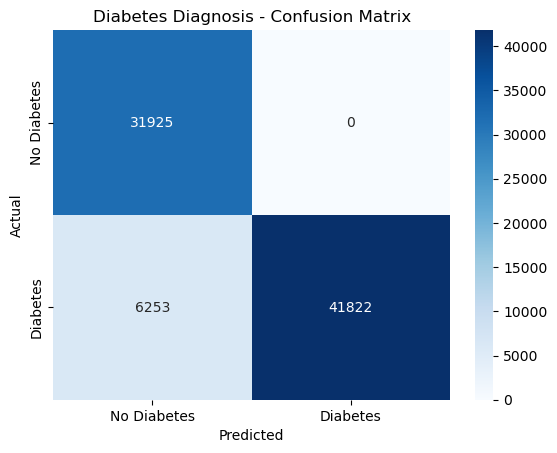

Accuracy: 0.9218375
Precision: 1.0
Recall: 0.8699323972958919
F1 Score: 0.9304426176624359


Test Set Metrics:


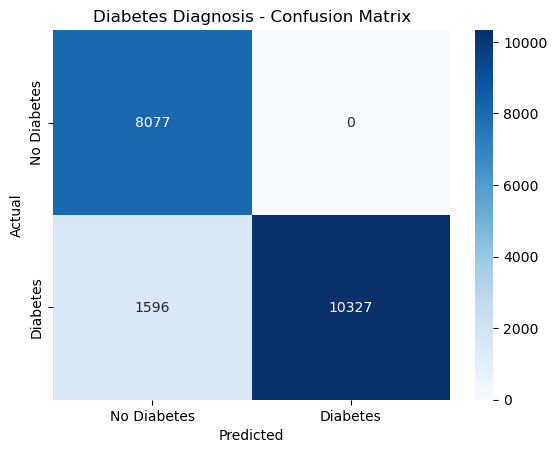

Accuracy: 0.9202
Precision: 1.0
Recall: 0.866141071877883
F1 Score: 0.9282696629213483


In [5]:
evaluate_metrics(y_train, y_train_pred, "Training Set Metrics:")

print("\n" + "="*75 + "\n")

evaluate_metrics(y_test, y_test_pred, "Test Set Metrics:")

Now let us test the model with only 1 or 3 features we already know to be most promising.

In [7]:
df.columns[[0, 4, 6]]

Index(['family_history_diabetes', 'glucose_fasting', 'hba1c'], dtype='object')

In [10]:
feature_indices = [0, 4, 6]

lgbm_2 = LGBMClassifier(random_state=2025)
lgbm_2.fit(X_train[:, feature_indices], y_train)

y_train_pred = lgbm_2.predict(X_train[:, feature_indices])
y_test_pred = lgbm_2.predict(X_test[:, feature_indices])

[LightGBM] [Info] Number of positive: 48075, number of negative: 31925
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.600938 -> initscore=0.409373
[LightGBM] [Info] Start training from score 0.409373


c:\Users\Sebastijan\anaconda3\envs\diabetes-insight\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sebastijan\anaconda3\envs\diabetes-insight\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training Set Metrics:


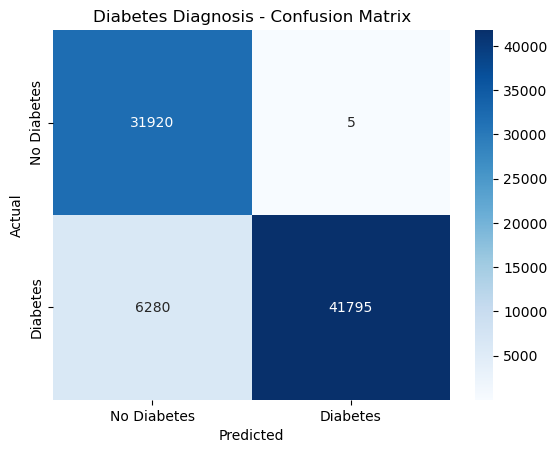

Accuracy: 0.9214375
Precision: 0.9998803827751196
Recall: 0.8693707748309932
F1 Score: 0.9300695410292072


Test Set Metrics:


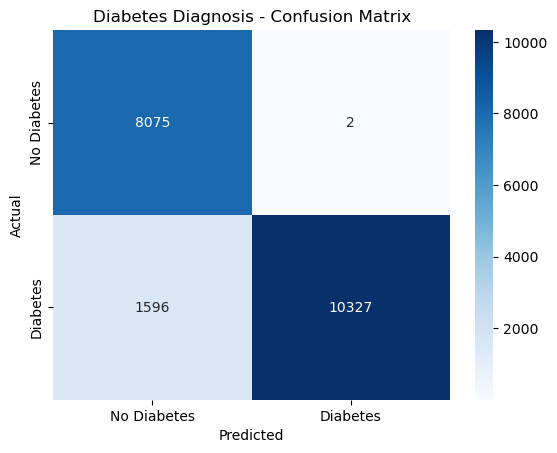

Accuracy: 0.9201
Precision: 0.9998063704133991
Recall: 0.866141071877883
F1 Score: 0.9281862304511954


In [11]:
evaluate_metrics(y_train, y_train_pred, "Training Set Metrics:")

print("\n" + "="*75 + "\n")

evaluate_metrics(y_test, y_test_pred, "Test Set Metrics:")

This model performs almost as well, with only 3 features and no hyperparameter tuning. Let us see how the model will perform with just a single feature.

In [13]:
lgbm_2 = LGBMClassifier(random_state=2025)
lgbm_2.fit(X_train[:, [6]], y_train)

y_train_pred = lgbm_2.predict(X_train[:, [6]])
y_test_pred = lgbm_2.predict(X_test[:, [6]])

[LightGBM] [Info] Number of positive: 48075, number of negative: 31925
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.600938 -> initscore=0.409373
[LightGBM] [Info] Start training from score 0.409373


c:\Users\Sebastijan\anaconda3\envs\diabetes-insight\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sebastijan\anaconda3\envs\diabetes-insight\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training Set Metrics:


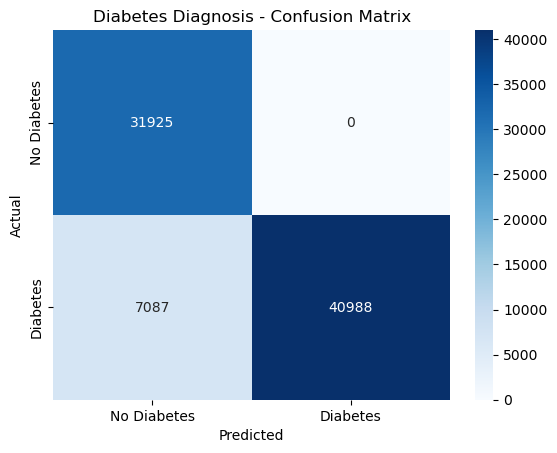

Accuracy: 0.9114125
Precision: 1.0
Recall: 0.8525845033801353
F1 Score: 0.9204271133916441


Test Set Metrics:


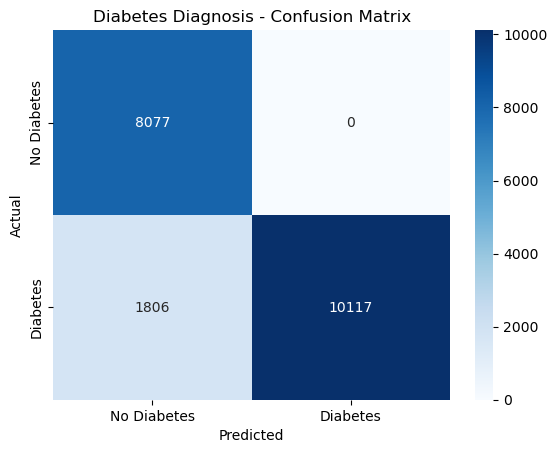

Accuracy: 0.9097
Precision: 1.0
Recall: 0.8485280550197098
F1 Score: 0.9180580762250454


In [14]:
evaluate_metrics(y_train, y_train_pred, "Training Set Metrics:")

print("\n" + "="*75 + "\n")

evaluate_metrics(y_test, y_test_pred, "Test Set Metrics:")

Using only one feature dropped our performance, albeit not by too much. Let us try the two combinations with hba1c and only one of the other variables, so that we can see how simple we can make this model while keeping almost all of its performance.

In [15]:
lgbm_3 = LGBMClassifier(random_state=2025)
lgbm_3.fit(X_train[:, [0, 6]], y_train)

y_train_pred = lgbm_3.predict(X_train[:, [0, 6]])
y_test_pred = lgbm_3.predict(X_test[:, [0, 6]])

[LightGBM] [Info] Number of positive: 48075, number of negative: 31925
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 258
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.600938 -> initscore=0.409373
[LightGBM] [Info] Start training from score 0.409373


c:\Users\Sebastijan\anaconda3\envs\diabetes-insight\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sebastijan\anaconda3\envs\diabetes-insight\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training Set Metrics:


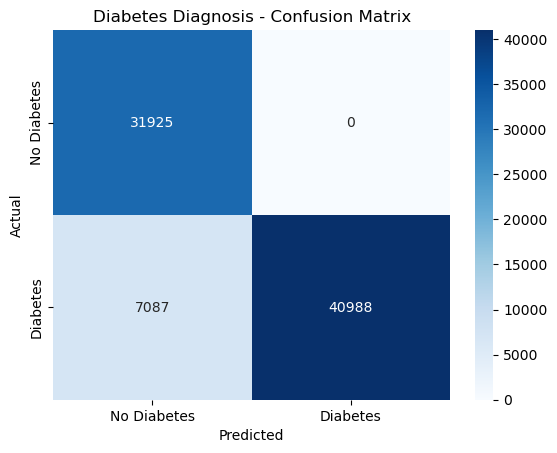

Accuracy: 0.9114125
Precision: 1.0
Recall: 0.8525845033801353
F1 Score: 0.9204271133916441


Test Set Metrics:


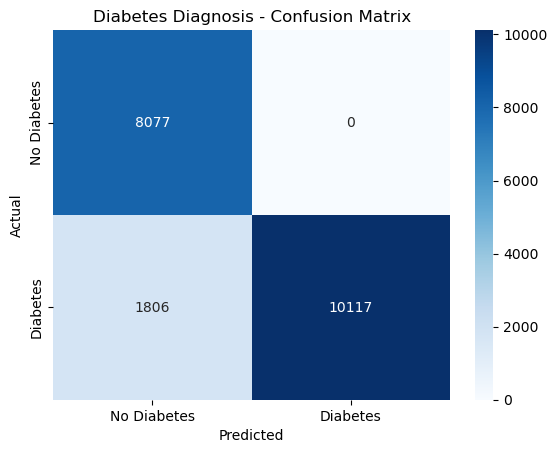

Accuracy: 0.9097
Precision: 1.0
Recall: 0.8485280550197098
F1 Score: 0.9180580762250454


In [16]:
evaluate_metrics(y_train, y_train_pred, "Training Set Metrics:")

print("\n" + "="*75 + "\n")

evaluate_metrics(y_test, y_test_pred, "Test Set Metrics:")

This is not good. Let us try the other option.

In [17]:
lgbm_4 = LGBMClassifier(random_state=2025)
lgbm_4.fit(X_train[:, [4, 6]], y_train)

y_train_pred = lgbm_4.predict(X_train[:, [4, 6]])
y_test_pred = lgbm_4.predict(X_test[:, [4, 6]])

[LightGBM] [Info] Number of positive: 48075, number of negative: 31925
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.600938 -> initscore=0.409373
[LightGBM] [Info] Start training from score 0.409373


c:\Users\Sebastijan\anaconda3\envs\diabetes-insight\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sebastijan\anaconda3\envs\diabetes-insight\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training Set Metrics:


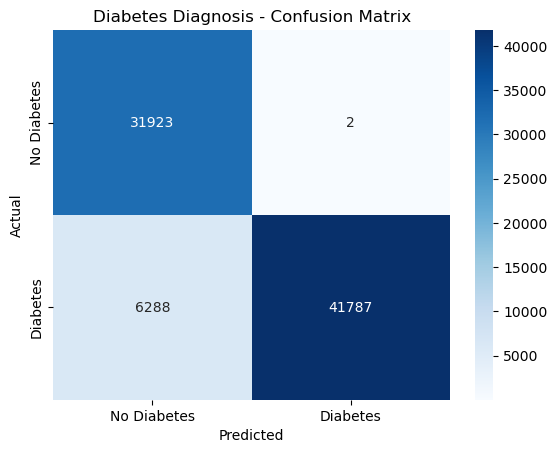

Accuracy: 0.921375
Precision: 0.9999521405154467
Recall: 0.869204368174727
F1 Score: 0.9300053414047894


Test Set Metrics:


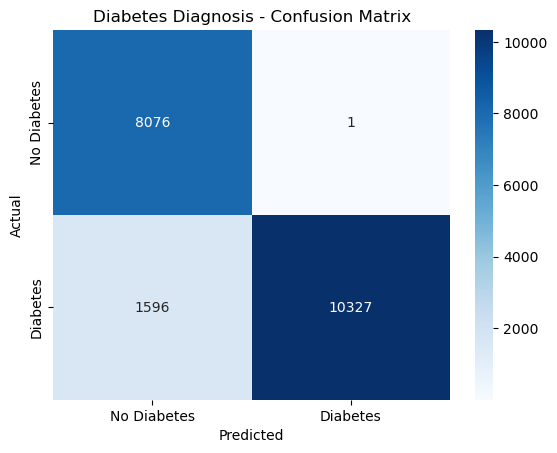

Accuracy: 0.92015
Precision: 0.9999031758326878
Recall: 0.866141071877883
F1 Score: 0.9282279448114692


In [18]:
evaluate_metrics(y_train, y_train_pred, "Training Set Metrics:")

print("\n" + "="*75 + "\n")

evaluate_metrics(y_test, y_test_pred, "Test Set Metrics:")

Fantastic! Using only these two features, we are able to reach the same performance as with much more complex, tuned models. We will still try to see if the threshold can be adjusted. That one instance of a false positive is the only performance drop in this model.

In [19]:
y_train_pred_proba = lgbm_4.predict_proba(X_train[:, [4, 6]])[:, 1]
y_test_pred_proba = lgbm_4.predict_proba(X_test[:, [4, 6]])[:, 1]

c:\Users\Sebastijan\anaconda3\envs\diabetes-insight\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sebastijan\anaconda3\envs\diabetes-insight\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


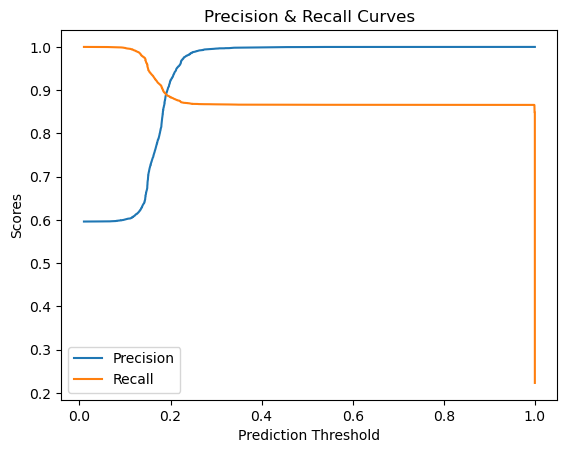

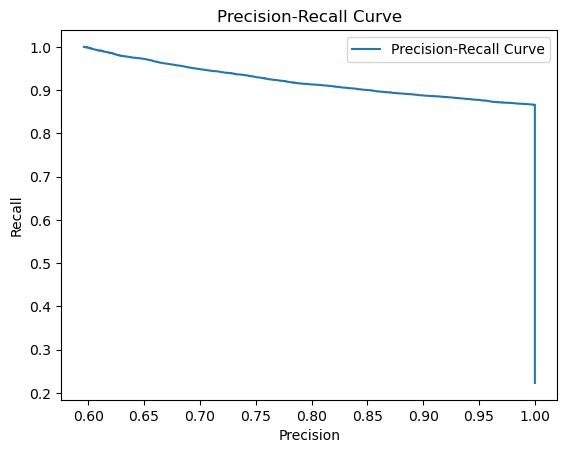

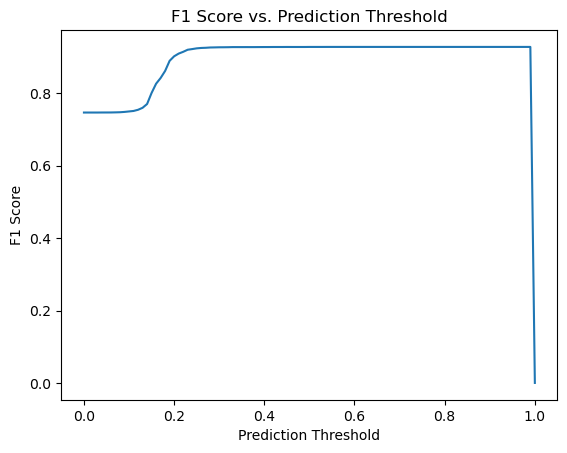

Optimal threshold: 0.54


In [20]:
thresh = optimize_threshold(y_test, y_test_pred_proba)
print(f"Optimal threshold: {thresh}")

In [21]:
preds_train = y_train_pred_proba >= thresh
preds_test = y_test_pred_proba >= thresh

Training Set Metrics with Optimized Threshold:


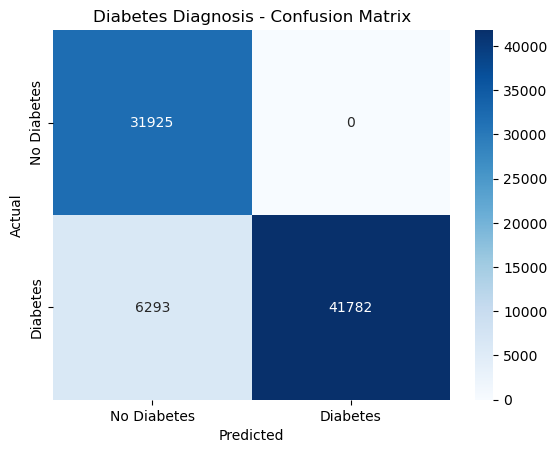

Accuracy: 0.9213375
Precision: 1.0
Recall: 0.8691003640145606
F1 Score: 0.9299665023314823


Test Set Metrics with Optimized Threshold:


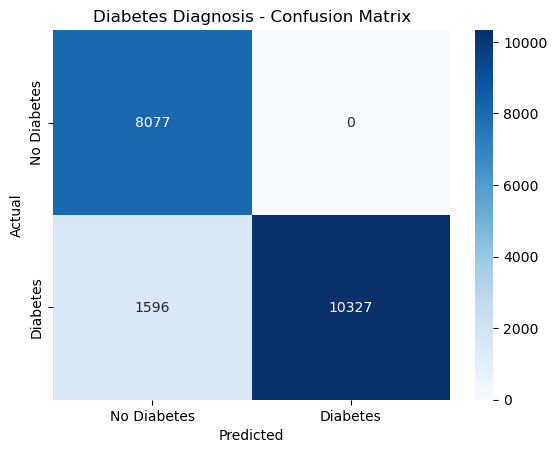

Accuracy: 0.9202
Precision: 1.0
Recall: 0.866141071877883
F1 Score: 0.9282696629213483


In [22]:
evaluate_metrics(y_train, preds_train, "Training Set Metrics with Optimized Threshold:")

print("\n" + "="*75 + "\n")

evaluate_metrics(y_test, preds_test, "Test Set Metrics with Optimized Threshold:")

Amazing! Tuning our threshold helped us reach great performance with a very simple model. The best model we've had during training had only 2 less instances of false negatives, but required a lot more features and tuning. Hence, this model is better. We will now plot the roc curve as well.

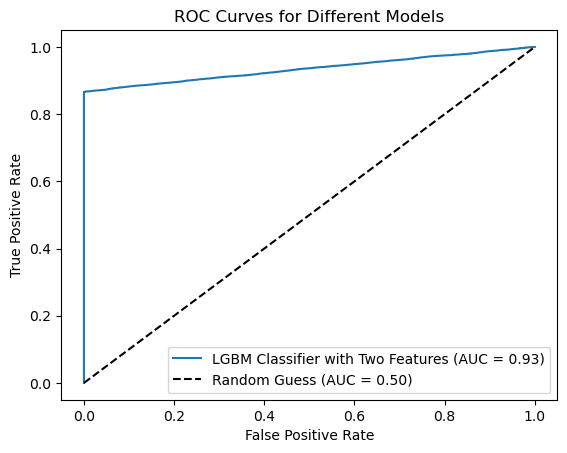

In [23]:
plot_roc_curve(y_test, y_test_pred_proba, "LGBM Classifier with Two Features")

The AUC is 0.01 lower than that of a few of the other models, but that is a very small difference, considering that we had been able to achieve this without any tuning.

In [ ]:
def prepare_data_boost(df):
    X = df[['glucose_fasting', 'hba1c']]
    y = df["diagnosed_diabetes"]

    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y,
        test_size=0.3,
        random_state=2025,
        shuffle=True
    )

    X_valid, X_test, y_valid, y_test = train_test_split(
        X_temp, y_temp,
        test_size=0.5,
        random_state=2025,
        shuffle=True
    )

    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_valid_std = scaler.transform(X_valid)
    X_test_std = scaler.transform(X_test)

    return X_train_std, X_valid_std, X_test_std, y_train, y_valid, y_test

In [4]:
X_train, X_valid, X_test, y_train, y_valid, y_test = prepare_data_boost(df)

In [5]:
def objective(trial):
    params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'device': 'cpu',
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.05, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 16, 64),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'n_estimators': 500,
        'verbose': -1,
    }

    model = lgb.LGBMClassifier(**params)

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    f1 = cross_val_score(
        model,
        X_train,
        y_train,
        scoring=make_scorer(f1_score),
        cv=cv,
        n_jobs=-1
    ).mean()

    return f1

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30, timeout=600)

print("Best F1:", study.best_value)
print("Best hyperparameters:", study.best_params)

[I 2025-11-12 16:41:46,621] A new study created in memory with name: no-name-eafde6c9-f648-4b99-9093-570391b1e50f
[I 2025-11-12 16:41:52,880] Trial 0 finished with value: 0.9297474671658729 and parameters: {'learning_rate': 0.02028741899091831, 'num_leaves': 25, 'max_depth': 8, 'min_child_samples': 53, 'subsample': 0.8367527492515292, 'colsample_bytree': 0.9955671954003247, 'reg_alpha': 0.6676617194304405, 'reg_lambda': 0.7360214365774862}. Best is trial 0 with value: 0.9297474671658729.
[I 2025-11-12 16:41:59,020] Trial 1 finished with value: 0.9297256580475753 and parameters: {'learning_rate': 0.043974521922684744, 'num_leaves': 53, 'max_depth': 8, 'min_child_samples': 60, 'subsample': 0.76064810841095, 'colsample_bytree': 0.9867531208341731, 'reg_alpha': 0.1317754985809224, 'reg_lambda': 0.7617491287027661}. Best is trial 0 with value: 0.9297474671658729.
[I 2025-11-12 16:42:05,375] Trial 2 finished with value: 0.9297119811768798 and parameters: {'learning_rate': 0.02908583070278421

Best F1: 0.9297474671658729
Best hyperparameters: {'learning_rate': 0.02028741899091831, 'num_leaves': 25, 'max_depth': 8, 'min_child_samples': 53, 'subsample': 0.8367527492515292, 'colsample_bytree': 0.9955671954003247, 'reg_alpha': 0.6676617194304405, 'reg_lambda': 0.7360214365774862}


In [11]:
lgbm_tuned = LGBMClassifier(**study.best_params)

lgbm_tuned.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric='f1',
)

[LightGBM] [Info] Number of positive: 42072, number of negative: 27928
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 359
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.601029 -> initscore=0.409753
[LightGBM] [Info] Start training from score 0.409753
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

,boosting_type,'gbdt'
,num_leaves,25
,max_depth,8
,learning_rate,0.02028741899091831
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,53


In [9]:
y_train_pred = lgbm_tuned.predict(X_train[:, [4, 6]])
y_test_pred = lgbm_tuned.predict(X_test[:, [4, 6]])

IndexError: index 4 is out of bounds for axis 1 with size 2